## [Introduction to 9 regression algorithms](https://github.com/BindiChen/machine-learning/blob/master/traditional-machine-learning/001-regression-algorithms/regression-algorithms.ipynb)

In [1]:
from vega_datasets import data
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'

In [2]:
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              406 non-null    object        
 1   Miles_per_Gallon  398 non-null    float64       
 2   Cylinders         406 non-null    int64         
 3   Displacement      406 non-null    float64       
 4   Horsepower        400 non-null    float64       
 5   Weight_in_lbs     406 non-null    int64         
 6   Acceleration      406 non-null    float64       
 7   Year              406 non-null    datetime64[ns]
 8   Origin            406 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [4]:
df.dropna(subset=['Horsepower', 'Miles_per_Gallon'], inplace=True)
df.sort_values(by='Horsepower', inplace=True)
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
25,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,1970-01-01,Europe
109,volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,1973-01-01,Europe
333,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,1980-01-01,Europe
332,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980-01-01,Europe
251,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978-01-01,Europe


In [5]:
X = df['Horsepower'].to_numpy().reshape(-1, 1)
y = df['Miles_per_Gallon'].to_numpy().reshape(-1, 1)

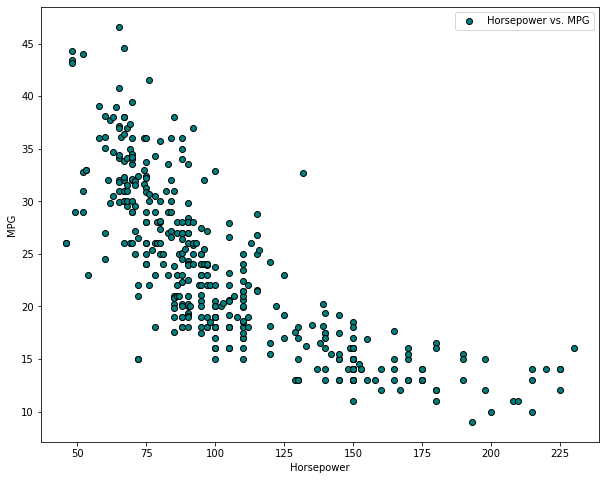

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

### 1. Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [10]:
linear_regressor.coef_

array([[-0.15784473]])

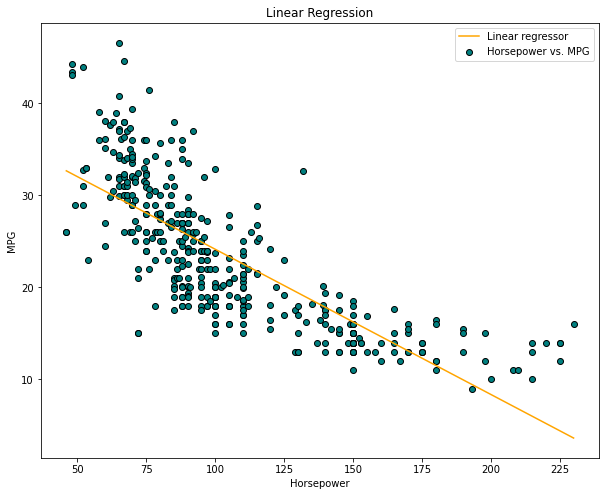

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. MPG')
plt.plot(X, linear_regressor.predict(X), color='orange', label='Linear regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression')
plt.legend()

A few key points about Linear Regression:
+ Fast and easy to model
+ It’s particularly useful when the relationship to be modeled is not extremely complex and if you don’t have a lot of data.
+ Very intuitive to understand and interpret.
+ It’s very sensitive to outliers.

## 2. Polynomial Regression

Polynomial Regression is one of the most popular choices when we want to create a model for non-linearly separable data. It’s like linear regression but uses the relationship between the variables X and y to find the best way to draw a curve that fits into the data points.

For a polynomial regression, the power of some independent variables is more than 1. For example, we might propose a quadratic model as follows:

$$\large \beta_0 + \beta_1x + \beta_2x^2 + \varepsilon$$
+ $β_0$, $β_1$, and $β_2$ are coefficients
+ $x$ is a variable/feature
+ $ε$ is the bias

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [23]:
# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression()

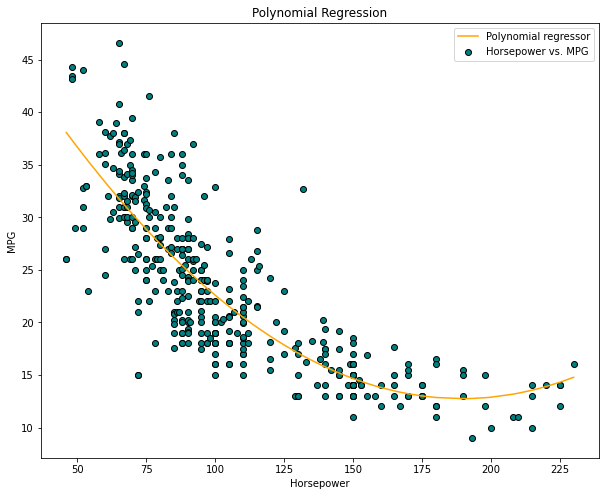

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. MPG')
plt.plot(X, poly_reg_model.predict(X_poly), color='orange', label='Polynomial regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression')
plt.legend()

A few key points about Polynomial Regression:
+ Able to model non-linearly separable data; linear regression can’t do this. It is much more flexible in general and can model some fairly complex relationships.
+ Full control over the modeling of feature variables (which exponent to set).
+ Requires careful design. Need some knowledge of the data in order to select the best exponents.
+ Prone to overfitting if exponents are poorly selected.

## 3. Support Vector Regression

Support Vector Machines are well-known in classification problems. The use of SVM in regression is known as Support Vector Regression (SVR). 

Before fitting an SVR model, it’s generally a best practice to perform feature scaling so that each feature has a similar importance. 

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [26]:
# Performing feature scaling
scaled_X = StandardScaler()
scaled_y = StandardScaler()
scaled_X = scaled_X.fit_transform(X)
scaled_y = scaled_y.fit_transform(y)

In [28]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(scaled_X, scaled_y.ravel())

SVR(gamma='auto')

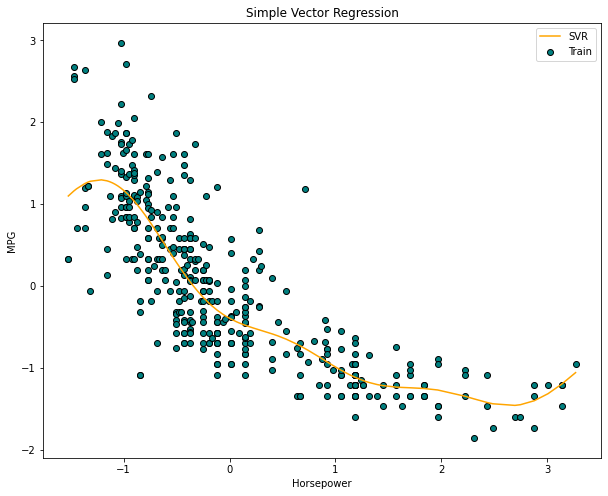

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(scaled_X, scaled_y, color='teal', edgecolors='black', label='Train')
plt.plot(scaled_X, svr_regressor.predict(scaled_X), color='orange', label='SVR')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Simple Vector Regression')
plt.legend()

A few key points about Support Vector Regression
+ It’s robust to outliers and effective in high dimensional spaces
+ It has an excellent generalization capability (the ability to adapt properly to new, previously unseen data)
+ Prone to overfitting if the number of features is much greater than the number of samples

## 4. Decision Tree Regression

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression [1]. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [32]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

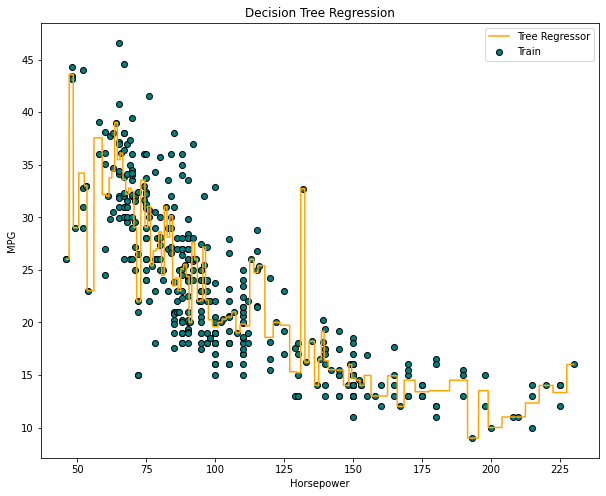

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X_grid, tree_regressor.predict(X_grid), color='orange', label='Tree Regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Decision Tree Regression')
plt.legend()

A few key points about the Decision Tree:
+ Easy to understand and interpret. Trees can be visualized.
+ Works well with both categorical and continuous values
+ The cost of using the DT (i.e., predicting data) is logarithmic in the number of data points used to train the tree
+ Predictions of decision trees are neither smooth nor continuous 

## 6. LASSO Regression

LASSO regression is a variation of Linear Regression that uses Shrinkage. Shrinkage is a process that data values are shrunk towards a central point as the mean. This type of regression is well-suited for models showing heavy multicollinearity (heavy correlation of features with each other).

In [35]:
from sklearn.linear_model import LassoCV

In [36]:
lasso = LassoCV()
lasso.fit(X, y.ravel())

LassoCV()

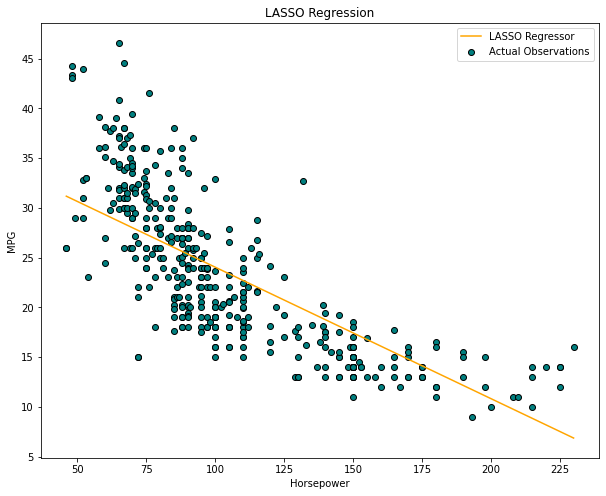

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Actual Observations')
plt.plot(X, lasso.predict(X), color='orange', label='LASSO Regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('LASSO Regression')
plt.legend()

A few points about Lasso Regression:
+ It’s most often used for eliminating automated variables and the selection of features.
+ It’s well-suited for models showing heavy multicollinearity (heavy correlation of features with each other).
+ LASSO regression utilizes L1 regularization
+ LASSO regression is considered to be better than Ridge as it selects only some features and decreases the coefficients of others to zero.

## 7. Ridge Regression

Ridge regression is quite similar to LASSO regression in that both techniques use Shrinkage. Both Ridge and LASSO regression are well-suited for models showing heavy multicollinearity (heavy correlation of features with each other). The main difference between them is that Ridge uses L2 regularization, which means none of the coefficients become zero as they do in LASSO regression (near-zero instead).

In [38]:
from sklearn.linear_model import RidgeCV

In [39]:
ridge = RidgeCV()
ridge.fit(X, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

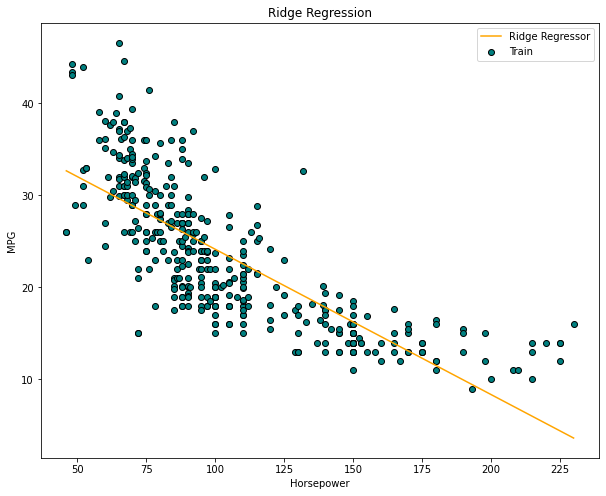

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, ridge.predict(X), color='orange', label='Ridge Regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Ridge Regression')
plt.legend()

A few points about Ridge Regression:
+ It’s well-suited for models showing heavy multicollinearity (heavy correlation of features with each other).
+ Ridge Regression uses L2 regularization. The less contributing features will have a near-zero coefficient.
+ Ridge regression is considered to be worse than LASSO due to the nature of L2 regularization

## 8. ElasticNet Regression

ElasticNet is another Linear Regression model trained with both L1 and L2 regularization. It’s a hybrid of Lasso and Ridge Regression techniques, therefore it’s also well-suited for models showing heavy multicollinearity (heavy correlation of features with each other).

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [41]:
from sklearn.linear_model import ElasticNetCV

In [42]:
elasticNet = ElasticNetCV()
elasticNet.fit(X, y.ravel())

ElasticNetCV()

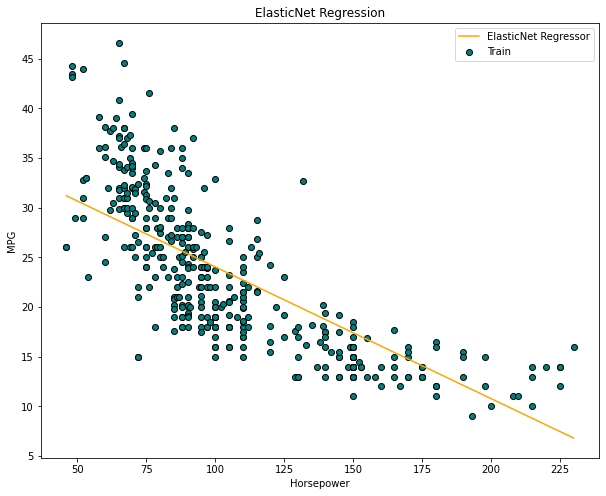

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, elasticNet.predict(X), color='orange', label='ElasticNet Regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('ElasticNet Regression')
plt.legend()

A few key points about ElasticNet Regression:
+ ElasticNet is always preferred over LASSO and Ridge because it solves the drawbacks of both algorithms
+ ElasticNet comes with the additional overhead of determining the two lambda values for optimal solutions.

## 9. XGBoost Regression
Extreme Gradient Boosting (XGBoost) is an efficient and effective implementation of the gradient boosting algorithm. Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression problems.

In [44]:
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(
    n_estimators=1000, 
    max_depth=7, 
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8,
)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

+ `n_estimators`: The number of trees in the ensemble, often increased until no further improvements are seen.
+ `max_depth`: The maximum depth of each tree, often values are between 1 and 10.
+ `eta`: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
+ `subsample`: The number of samples used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
+ `colsample_bytree`: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

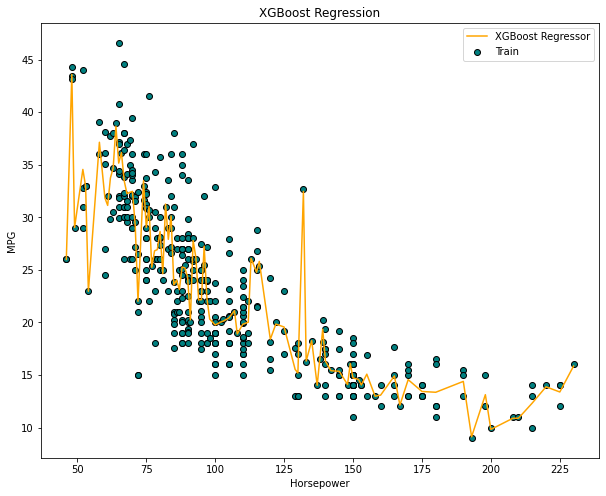

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, model.predict(X), color='orange', label='XGBoost Regressor')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('XGBoost Regression')
plt.legend()

A few points about XGBoost:
+ XGBoost does not perform so well on sparse and unstructured data.
+ The algorithm is designed to be both computationally efficient and highly effective, but the training time is still pretty high for a large dataset
+ It’s sensitive to outliers